# 1-Clustering-Müzik Türlerini Kümeleme

<img src="genres.jpg">

Python kullanarak bu tür bir görevi gerçekleştirmek için aşağıdaki adımları izleyebilirsiniz:

1. **Veri Toplama**: İlk adım, analiz için kullanacağınız müzik özelliklerini içeren bir veri kümesi toplamak veya oluşturmak olacaktır. Bu özellikler, örneğin tempo, tonal özellikler, ritim, enstrümantasyon gibi müzikle ilgili özellikler olabilir. Bu verileri kullanarak her müziği bir dizi sayısal özellikle temsil edebilirsiniz.

2. **Veri Temizleme ve Dönüştürme**: Topladığınız veya bulduğunuz verileri temizlemek ve uygun bir formata dönüştürmek önemlidir. Eksik veya anlamsız verileri ele almalı ve sayısal verilere dönüştürmelisiniz.

3. **Veriyi Standartlaştırma**: Verileri standartlaştırmak, farklı özelliklerin aynı ölçekte olduğundan emin olmak için önemlidir. Özellikle kümeleme algoritmaları için önemlidir.

4. **Kümeleme Algoritmasını Seçme**: Müzik türlerini kümelemek için farklı algoritmaları deneyebilirsiniz. K-Means, Hierarchical Clustering, DBSCAN gibi popüler kümeleme algoritmaları arasından birini seçebilirsiniz.

5. **Kümeleme Analizi**: Seçtiğiniz algoritmayı kullanarak verileri kümeleyin. Her bir müziği belirli bir kümeyle ilişkilendireceksiniz.

6. **Sonuçları Değerlendirme**: Kümeleme sonuçlarını değerlendirmek için farklı metrikleri kullanabilirsiniz. Örneğin, her kümenin ne kadar homojen olduğunu veya küme merkezlerinin ne kadar uzak olduğunu inceleyebilirsiniz.

7. **Sonuçları Görselleştirme**: Kümeleme sonuçlarını görselleştirmek, hangi müzik türlerinin bir araya geldiğini veya hangi özelliklerin önemli olduğunu daha iyi anlamanıza yardımcı olabilir.

8. **Sonuçları Yorumlama**: Elde ettiğiniz sonuçları müzik türleri açısından yorumlayın. Hangi müzik türlerinin benzer özelliklere sahip olduğunu ve bu kümeleme analizinin müzik sınıflandırması veya önerileri için nasıl kullanılabileceğini düşünün.

Bu adımları takip ederek, müzik türlerini kümelemek için bir makine öğrenimi uygulaması geliştirebilirsiniz. İhtiyacınıza göre bu adımları daha fazla ayrıntıyla ve kod örnekleriyle inceleyebilirsiniz. Başarılar dilerim! Eğer daha fazla yardım veya öneriye ihtiyacınız varsa, lütfen sormaktan çekinmeyin.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)
import sqlite3
from sqlite3 import Error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## 1. **Veri Toplama ve İnceleme**:
Toplanılmış hzır csv veriyi okuyoruz:

In [2]:
df=pd.read_csv("Spotify-2000.csv")

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.sample(3)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1466,1467,Poison,Alice Cooper,album rock,1989,119,91,28,-6,18,26,270,3,11,70
766,767,Als De Rook Om Je Hoofd Is Verdwenen,Boudewijn de Groot,dutch indie,2018,132,71,42,-11,3,64,205,14,3,19
1257,1258,Nur geträumt,Nena,german pop,1983,177,80,54,-9,8,89,220,7,3,56


In [5]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [6]:
df.corr()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Index,1.000000,-0.607910,-0.048918,-0.114307,-0.047156,-0.260179,-0.027125,0.063304,0.057346,-0.050991,0.087442
Year,-0.607910,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),-0.048918,0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,-0.114307,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,-0.047156,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness (dB),-0.260179,0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,-0.027125,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,0.063304,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,0.057346,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,-0.050991,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689


In [10]:
df.shape

(1994, 14)

In [11]:
df.sample(3)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
356,Sunrise,Simply Red,british soul,2004,106,73,79,-5,10,94,200,0,3,55
514,Clown,Emeli Sandé,dance pop,2012,119,26,46,-8,11,23,221,92,4,46
1031,Paradise By the Dashboard Light,Meat Loaf,album rock,1977,173,87,33,-8,46,49,508,21,12,67


1. **Title**: Başlık (Title) sütunu, her müziğin adını içerir.

2. **Artist**: Sanatçı adını içerir ve her müziği belirli bir sanatçıya atar.

3. **Top Genre**: Bu sütun, müziğin ana türünü gösterir. Örneğin, "pop," "disco," ve "blues rock" gibi farklı müzik türleri burada bulunmaktadır.

4. **Year**: Müziğin yayınlandığı yıl bilgisini içerir.

5. **Beats Per Minute (BPM)**: Müziğin tempo hızını BPM cinsinden gösterir. Daha yüksek bir BPM, daha hızlı bir tempoya işaret eder.

6. **Energy**: Müziğin enerji seviyesini temsil eder. Daha yüksek bir enerji seviyesi, daha enerjik bir müzik parçasını gösterebilir.

7. **Danceability**: Müziğin dans edilebilirlik düzeyini ifade eder. Daha yüksek bir dans edilebilirlik puanı, müziğin dans etmek için daha uygun olduğunu gösterebilir.

8. **Loudness (dB)**: Müziğin ses düzeyini desibel (dB) cinsinden ifade eder. Daha düşük dB değerleri daha sessiz müzikleri, daha yüksek dB değerleri ise daha yüksek sesle çalınan müzikleri gösterir.

9. **Liveness**: Müziğin canlılık derecesini temsil eder. Daha yüksek bir liveness değeri, müziğin canlı bir performansa işaret edebilir.

10. **Valence**: Müziğin olumlu bir duygu veya olumsuz bir duygu taşıma derecesini yansıtır. Daha yüksek bir valence değeri, daha pozitif bir müzik parçasını gösterebilir.

11. **Length (Duration)**: Müziğin süresini belirler. Saniye cinsinden süreyi ifade eder.

12. **Acousticness**: Müziğin ne kadar akustik enstrümanlar içerdiğini gösterir. Daha yüksek bir akustiklik değeri, daha çok akustik enstrüman içeren müziği ifade edebilir.

13. **Speechiness**: Müziğin söz içeriğinin ne kadar belirgin olduğunu ifade eder. Daha yüksek bir speechiness değeri, daha çok sözlü bir müziği gösterebilir.

14. **Popularity**: Müziğin popülerlik derecesini gösterir. Daha yüksek bir popülerlik değeri, daha popüler bir müziği ifade edebilir.

## 2. **Veri Temizleme ve Dönüştürme**:

In [8]:
df.info() # Drop edeceğimiz boş veri yok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [9]:
# İhtiyac olmayanları çıkaralım 
df.drop(["Index"], axis=1, inplace=True)

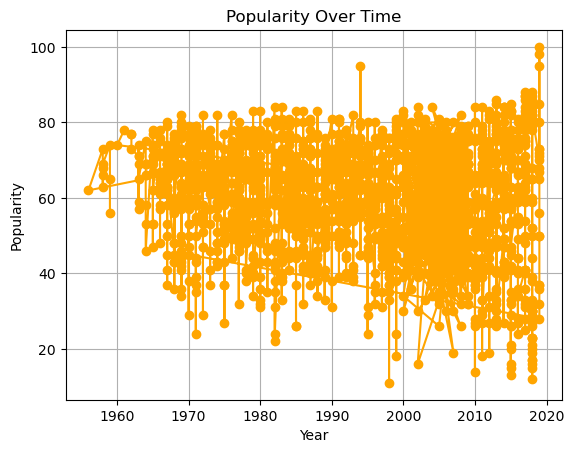

In [18]:
# Zaman Serileri Grafikleri: 
if 'Year' in df.columns:
    plt.plot(df['Year'], df['Popularity'], marker='o', linestyle='-', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.title('Popularity Over Time')
    plt.grid()
    plt.show()
else:
    print("Year column not found in the dataset.")

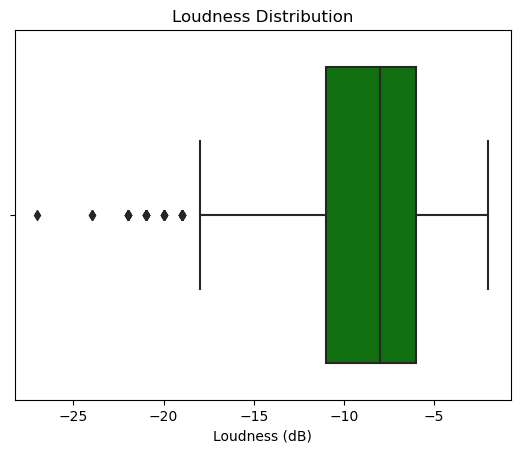

In [20]:
import seaborn as sns
sns.boxplot(x='Loudness (dB)', data=df, color='green')
plt.title('Loudness Distribution')
plt.show()

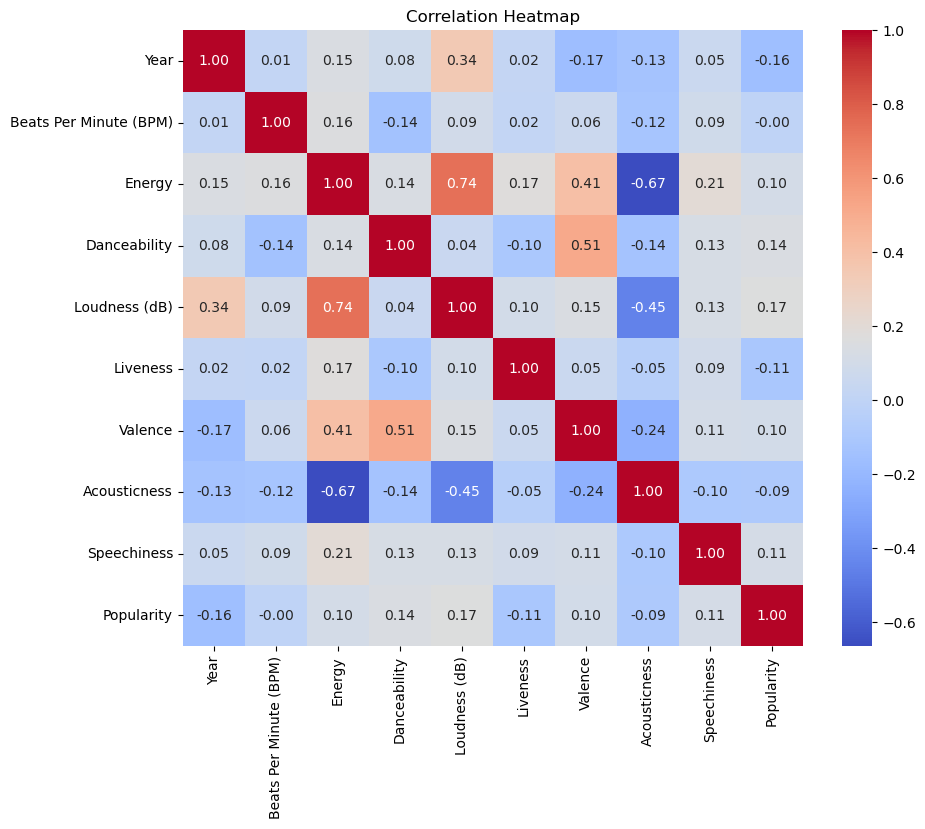

In [21]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 3. **Veriyi Standartlaştırma**:

Bu kod, sadece sayısal sütunları seçer, bir StandardScaler nesnesi oluşturur ve verileri standartlaştırır. Sonuç olarak, df2 adında bir DataFrame oluşturulur ve bu DataFrame, standartlaştırılmış verileri içerir.

Bu işlem sayesinde verileriniz aynı ölçeğe sahip olur ve çoğu kümeleme algoritması bu tür standartlaştırılmış verilerle daha iyi çalışır.

In [22]:
from sklearn.preprocessing import StandardScaler

# Standartlaştırma için sadece sayısal sütunları seçelim
numeric_columns = df.select_dtypes(include=['int64'])

# Standartlaştırma işlemi için bir StandardScaler nesnesi oluşturalım
scaler = StandardScaler()

# Verileri standartlaştıralım
scaled_data = scaler.fit_transform(numeric_columns)

# Standartlaştırılmış verileri yeni bir DataFrame'e ekleyelim
df1 = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# İlk birkaç satırı görüntüleyelim
print(df1.head())

       Year  Beats Per Minute (BPM)    Energy  Danceability  Loudness (dB)  \
0  0.683156                1.312739 -1.340009     -0.015521      -1.368667   
1  0.434894                0.527616  0.872304     -0.210991      -0.546064   
2  0.496960                1.705301  0.420812      0.831514       0.002338   
3  0.869353                1.883738  1.639841     -0.667086       1.373342   
4  0.559025               -0.507320  1.007752      0.310261       1.099141   

   Liveness   Valence  Acousticness  Speechiness  Popularity  
0 -0.479098  0.748080      2.245908    -0.453358    0.799653  
1 -0.120314  1.271177     -0.408833     0.455637   -1.430623  
2 -0.718286  0.104268     -0.925990     2.728126    0.660261  
3 -0.957475 -0.499305     -0.994944    -0.226109    1.148133  
4 -0.538895  1.512607     -0.960467    -0.453358   -0.036701  


In [26]:
df.corr()['Popularity'].sort_values(ascending=False)

Popularity                1.000000
Loudness (dB)             0.165527
Danceability              0.144344
Speechiness               0.111689
Energy                    0.103393
Valence                   0.095911
Beats Per Minute (BPM)   -0.003181
Acousticness             -0.087604
Liveness                 -0.111978
Year                     -0.158962
Name: Popularity, dtype: float64

## 5. **Kümeleme Analizi**:(Model girdilerini tanımla ve Modelleme)

In [45]:
config = get_config().split()

NameError: name 'get_config' is not defined

In [42]:
x=df[["Loudness (dB)","Danceability","Speechiness","Energy","Valence"]]

In [43]:
model=KMeans(4)

In [44]:
model=model.fit(x)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
pred=model.predict(x)

In [ ]:
pred

In [ ]:
silhouette_score(x,pred)

In [ ]:
x["cluster"]=pred

In [ ]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [ ]:
clust(10)

Bu sonuçlar, farklı küme sayıları (2'den 10'a kadar) için hesaplanan kümeleme skorlarını temsil ediyor. Bu skorlar, kümeleme sonuçlarının ne kadar homojen veya tutarlı olduğunu değerlendirmek için kullanılan bir ölçüdür. Genellikle bu ölçü, Elbow Yöntemi olarak adlandırılan bir yöntemin bir parçası olarak kullanılır.

Elbow Yöntemi, farklı küme sayıları için kümeleme skorlarını inceleyerek, verinin ne kadar iyi kümelendiğini belirlemeye çalışır. Genellikle, bu skorlar grafiğe dökülür ve "dirsek noktası" olarak adlandırılan bir noktada grafiğin eğiminin ani bir değişim gösterdiği küme sayısı seçilir. Dirsek noktası, küme sayısını belirlemek için bir ipucu sağlar.

Sonuçları yorumlarken:

- Bu skorlar arasında, en yüksek skor (0.3681) için 2 küme olduğunu gösteriyor.
- Skorlar küme sayısı arttıkça düşüyor, bu da daha fazla kümenin veriyi daha az tutarlı bir şekilde böldüğünü gösteriyor.
- Ancak, "dirsek noktası" olarak adlandırılan bir belirleyici nokta oluşturmak için bu skorları bir grafik üzerinde incelemek daha iyidir.

### Yellow Brick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
model=KMeans()

In [ ]:
visualizer=KElbowVisualizer(model,k=(2,10))

In [ ]:
visualizer.fit(x)

In [ ]:
visualizer.show()